In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn import feature_selection
import networkx as nx

In [2]:
#all_expr = pd.read_csv("../../CAR_data/AD_qc_count_expr.csv")
depth_normed = pd.read_csv("../../CAR_data/CLG_raw_expr_depth_normalised.csv")

In [3]:
# The network with the GRN
df = pd.read_csv('../../CAR_data/Network_with_GRN.tsv', sep = "\t", header=None)
df.columns = ["source", "target", "weight"]
Graphtype = nx.DiGraph()
G_GRN= nx.from_pandas_edgelist(df, create_using=Graphtype)
#nx.draw(G_GRN)

# Relplot of the raw counts

In [ ]:
# SPI1 = 0 coherent with SPI1 inhibits IL2RB
data = all_expr[["BCL11B", "SPI1", "IL2RB"]]
data["bin_BCL11B"] = pd.cut(data["BCL11B"], int(max(data["BCL11B"]+1)), labels = False)
data["bin_SPI1"] = pd.cut(data["SPI1"], int(max(data["SPI1"]+1)), labels = False)
data_binned = data.groupby(["bin_BCL11B", "bin_SPI1"]).mean().reset_index()

g = sns.relplot(
    data= data_binned,
    x="bin_BCL11B", y="bin_SPI1", hue = "IL2RB", 
    height=5, palette="flare")
g.set(title = "")

In [ ]:
g = sns.boxplot(
    data= all_expr,
    x="BCL11B", y="IL2RB")
g.set(title = "")

In [ ]:
# Mutual information
print(feature_selection.mutual_info_classif(
    np.array(
        data["BCL11B"]).reshape(-1, 1), 
        np.ravel(np.array(data["IL2RB"]).reshape(-1, 1)),
        discrete_features=True,
        random_state=1))

In [ ]:
# Kendall's Tau
all_expr["IL2RB"].corr(all_expr["BCL11B"], "kendall")

In [ ]:
# SPI1 = 0 coherent with SPI1 inhibits ETS1
data = all_expr[["ETS1", "SPI1", "GATA3"]]
data["bin_GATA3"] = pd.cut(data["GATA3"], int(max(data["GATA3"]+1)), labels = False)
data["bin_SPI1"] = pd.cut(data["SPI1"], int(max(data["SPI1"]+1)), labels = False)
data_binned = data.groupby(["bin_GATA3", "bin_SPI1"]).mean().reset_index()


g = sns.relplot(
    data= data_binned,
    x="bin_GATA3", y="bin_SPI1", hue = "ETS1", 
    height=5, palette="flare")
g.set(title = "")

In [ ]:
sns.set(font_scale= 0.9)

g = sns.boxplot(
    data= all_expr,
    x="GATA3", y="ETS1")
g.set(title = "", xticks=([ 1, 5, 10, 15, 20]))



In [ ]:
print(feature_selection.mutual_info_classif(
    np.array(
        data["GATA3"]).reshape(-1, 1), 
        np.ravel(np.array(data["ETS1"]).reshape(-1, 1)),
        discrete_features=True,
        random_state=1))

In [ ]:
# Kendall's Tau
all_expr["ETS1"].corr(all_expr["GATA3"], "kendall")

In [ ]:
# Here there is absolutely no visible relationship
g = sns.relplot(
    data= all_expr,
    x="BCL11B", y="RUNX3" ,
    height=5, palette="flare")
g.set(title = "")

In [ ]:
g = sns.boxplot(
    data= all_expr,
    x="BCL11B", y="RUNX3")
g.set(title = "")

In [ ]:
print(feature_selection.mutual_info_classif(
    np.array(
        all_expr["BCL11B"]).reshape(-1, 1), 
        np.ravel(np.array(all_expr["RUNX3"]).reshape(-1, 1)),
        discrete_features=True,
        random_state=1))

In [ ]:
plt.close("all")

# Relplot of the depth_normalised counts

/tmp/ipykernel_390806/3339657546.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["bin_BCL11B"] = pd.cut(data["BCL11B"], int(max(data["BCL11B"]+1)), labels = False)
/tmp/ipykernel_390806/3339657546.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["bin_SPI1"] = pd.cut(data["SPI1"], int(max(data["SPI1"]+1)), labels = False)


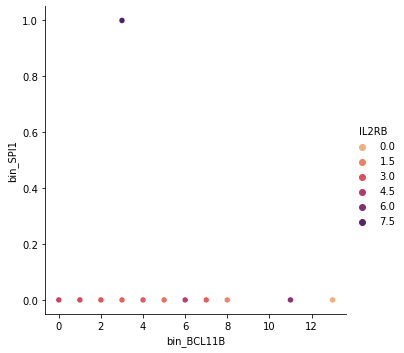

In [4]:
# SPI1 = 0 coherent with SPI1 inhibits IL2RB
data = depth_normed[["BCL11B", "SPI1", "IL2RB"]]
data["bin_BCL11B"] = pd.cut(data["BCL11B"], int(max(data["BCL11B"]+1)), labels = False)
data["bin_SPI1"] = pd.cut(data["SPI1"], int(max(data["SPI1"]+1)), labels = False)
data_binned = data.groupby(["bin_BCL11B", "bin_SPI1"]).mean().reset_index()

g = sns.relplot(
    data= data_binned,
    x="bin_BCL11B", y="bin_SPI1", hue = "IL2RB", 
    height=5, palette="flare")
g.set(title = "")

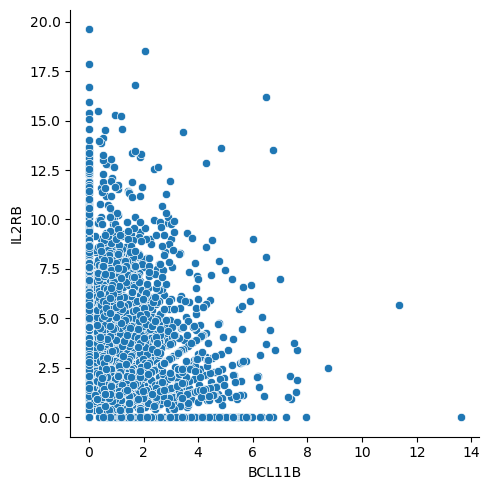

In [6]:
g = sns.relplot(
    data= depth_normed,
    x="BCL11B", y="IL2RB")
g.set(title = "")

In [8]:
# Mutual information
print(feature_selection.mutual_info_regression(
    np.array(
        data["BCL11B"]).reshape(-1, 1), 
        np.ravel(np.array(data["IL2RB"]).reshape(-1, 1)),
        discrete_features=True,
        random_state=1))

[0.04150243]


In [10]:
# Kendall's Tau
depth_normed["IL2RB"].corr(depth_normed["BCL11B"], "kendall")

-0.1052441764881389

/tmp/ipykernel_390806/1456565793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["bin_GATA3"] = pd.cut(data["GATA3"], int(max(data["GATA3"]+1)), labels = False)
/tmp/ipykernel_390806/1456565793.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["bin_SPI1"] = pd.cut(data["SPI1"], int(max(data["SPI1"]+1)), labels = False)


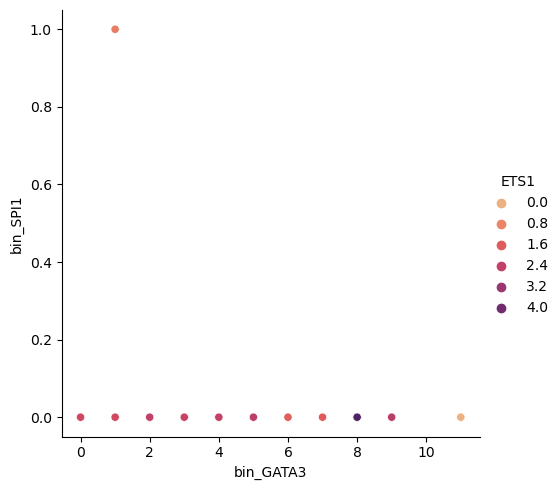

In [11]:
# SPI1 = 0 coherent with SPI1 inhibits ETS1
data = depth_normed[["ETS1", "SPI1", "GATA3"]]
data["bin_GATA3"] = pd.cut(data["GATA3"], int(max(data["GATA3"]+1)), labels = False)
data["bin_SPI1"] = pd.cut(data["SPI1"], int(max(data["SPI1"]+1)), labels = False)
data_binned = data.groupby(["bin_GATA3", "bin_SPI1"]).mean().reset_index()


g = sns.relplot(
    data= data_binned,
    x="bin_GATA3", y="bin_SPI1", hue = "ETS1", 
    height=5, palette="flare")
g.set(title = "")

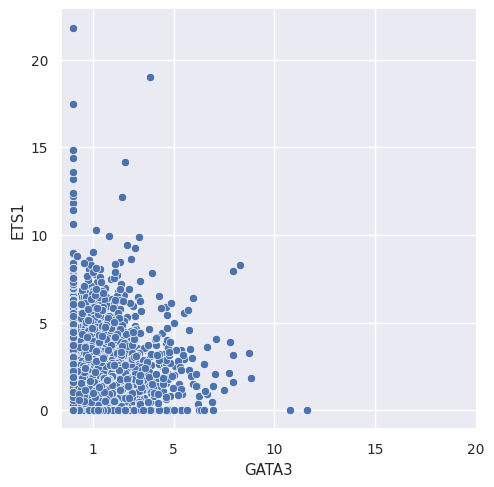

In [12]:
sns.set(font_scale= 0.9)

g = sns.relplot(
    data= depth_normed,
    x="GATA3", y="ETS1")
g.set(title = "", xticks=([ 1, 5, 10, 15, 20]))



In [13]:
print(feature_selection.mutual_info_regression(
    np.array(
        data["GATA3"]).reshape(-1, 1), 
        np.ravel(np.array(data["ETS1"]).reshape(-1, 1)),
        discrete_features=True,
        random_state=1))

[0.02219836]


In [14]:
# Kendall's Tau
depth_normed["ETS1"].corr(depth_normed["GATA3"], "kendall")

0.03155074436570999

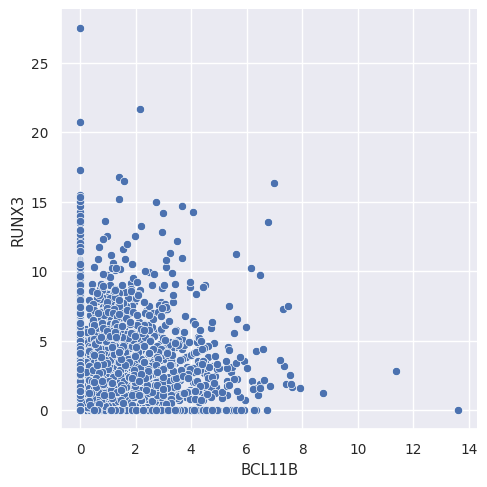

In [15]:
# Here there is absolutely no visible relationship
g = sns.relplot(
    data= depth_normed,
    x="BCL11B", y="RUNX3" ,
    height=5, palette="flare")
g.set(title = "")

In [ ]:
g = sns.boxplot(
    data= depth_normed,
    x="BCL11B", y="RUNX3")
g.set(title = "")

In [16]:
print(feature_selection.mutual_info_regression(
    np.array(
        depth_normed["BCL11B"]).reshape(-1, 1), 
        np.ravel(np.array(depth_normed["RUNX3"]).reshape(-1, 1)),
        discrete_features=True,
        random_state=1))

[0.02798121]


In [17]:
plt.close("all")

# The same genes with another scRNAseq dataset
 downloaded from https://www.ebi.ac.uk/gxa/sc/experiments/E-GEOD-106540/downloads

In [17]:
from scipy.io import mmread

In [18]:
data_mat = mmread("../../nonCAR_data/E-GEOD-106540-quantification-raw-files/E-GEOD-106540.aggregated_filtered_counts.mtx")

In [19]:
file = open("../../nonCAR_data/E-GEOD-106540-quantification-raw-files/E-GEOD-106540.aggregated_filtered_counts.mtx_cols")
col_names = file.readlines()
file.close()

In [20]:
file = open("../../nonCAR_data/E-GEOD-106540-quantification-raw-files/E-GEOD-106540.aggregated_filtered_counts.mtx_rows")
row_names = file.readlines()
file.close()

In [31]:
mapping = pd.read_csv("../../CAR_data/AD_GENEname_ENSEMBLid_NCBIid_KEGGko_NODEname.csv")
mapping.index = mapping["gene_ids"]
mapping

,index,gene_ids,ncbi_id,KEGG_ko,node_name
gene_ids,,,,,
ENSG00000278817,AC007325.4,ENSG00000278817,102724770.0,NoOrthology,NaN
ENSG00000278704,BX004987.4,ENSG00000278704,NaN,NaN,NaN
ENSG00000278633,AC023491.2,ENSG00000278633,NaN,NaN,NaN
ENSG00000278384,AL354822.1,ENSG00000278384,NaN,NaN,NaN
ENSG00000277856,AC233755.2,ENSG00000277856,NaN,NaN,NaN
...,...,...,...,...,...
ENSG00000244693,CTAGE8,ENSG00000244693,100142659.0,NoOrthology,NaN
ENSG00000225932,CTAGE4,ENSG00000225932,100128553.0,NoOrthology,NaN
ENSG00000116957,TBCE,ENSG00000116957,6905.0,K21768,NaN


In [27]:
node_names = {}
index_num = {}
index = 0
c=0
for node in row_names:
    
    ENSEMBL_id = node.split("\t")[0]
    index_num[ENSEMBL_id] = index
    index+=1
    print(ENSEMBL_id)
    try:

        node_id = mapping.loc[ENSEMBL_id]["index"]
        node_names[node_id] = ENSEMBL_id
    except:
        
        c+=1
        print(c)

ENSG00000000003
ENSG00000000419
ENSG00000000457
ENSG00000000460
ENSG00000000938
ENSG00000000971
ENSG00000001036
ENSG00000001084
ENSG00000001167
ENSG00000001460
ENSG00000001461
ENSG00000001497
ENSG00000001561
ENSG00000001617
ENSG00000001626
ENSG00000001629
ENSG00000001630
ENSG00000001631
ENSG00000002016
ENSG00000002079
1
ENSG00000002330
ENSG00000002549
ENSG00000002586
ENSG00000002587
ENSG00000002726
ENSG00000002745
ENSG00000002746
ENSG00000002822
ENSG00000002834
ENSG00000002919
ENSG00000002933
ENSG00000003056
ENSG00000003096
ENSG00000003137
ENSG00000003147
ENSG00000003249
ENSG00000003393
ENSG00000003400
ENSG00000003402
ENSG00000003436
ENSG00000003509
ENSG00000003756
ENSG00000003987
ENSG00000003989
ENSG00000004059
ENSG00000004139
ENSG00000004142
ENSG00000004399
ENSG00000004455
ENSG00000004468
ENSG00000004478
ENSG00000004487
ENSG00000004534
ENSG00000004660
ENSG00000004700
ENSG00000004766
ENSG00000004777
ENSG00000004779
ENSG00000004799
ENSG00000004809
ENSG00000004838
ENSG00000004846
ENSG00

ENSG00000088881
ENSG00000088882
ENSG00000088888
ENSG00000088899
ENSG00000088926
ENSG00000088930
ENSG00000088970
ENSG00000088986
ENSG00000088992
ENSG00000089006
ENSG00000089009
ENSG00000089012
ENSG00000089022
ENSG00000089041
ENSG00000089048
ENSG00000089050
ENSG00000089053
ENSG00000089057
ENSG00000089060
ENSG00000089063
ENSG00000089091
ENSG00000089094
ENSG00000089101
ENSG00000089123
ENSG00000089127
ENSG00000089154
ENSG00000089157
ENSG00000089159
ENSG00000089163
ENSG00000089169
ENSG00000089177
ENSG00000089195
ENSG00000089199
ENSG00000089220
ENSG00000089225
ENSG00000089234
ENSG00000089248
ENSG00000089250
ENSG00000089280
ENSG00000089289
ENSG00000089327
ENSG00000089335
ENSG00000089351
ENSG00000089356
ENSG00000089472
ENSG00000089486
ENSG00000089505
ENSG00000089558
ENSG00000089597
ENSG00000089639
ENSG00000089682
ENSG00000089685
ENSG00000089692
ENSG00000089693
ENSG00000089723
ENSG00000089737
ENSG00000089775
ENSG00000089818
ENSG00000089820
ENSG00000089847
ENSG00000089876
ENSG00000089902
ENSG0000

ENSG00000106336
ENSG00000106341
ENSG00000106344
ENSG00000106346
ENSG00000106348
ENSG00000106351
ENSG00000106355
ENSG00000106366
ENSG00000106367
ENSG00000106384
ENSG00000106392
ENSG00000106397
ENSG00000106399
ENSG00000106400
ENSG00000106404
ENSG00000106415
ENSG00000106436
ENSG00000106443
ENSG00000106459
ENSG00000106460
ENSG00000106462
ENSG00000106477
ENSG00000106479
ENSG00000106483
ENSG00000106484
ENSG00000106524
ENSG00000106526
ENSG00000106536
ENSG00000106537
ENSG00000106538
ENSG00000106540
20
ENSG00000106546
ENSG00000106554
ENSG00000106560
ENSG00000106565
ENSG00000106571
ENSG00000106588
ENSG00000106591
ENSG00000106603
ENSG00000106605
ENSG00000106608
ENSG00000106609
ENSG00000106610
21
ENSG00000106615
ENSG00000106617
ENSG00000106624
ENSG00000106628
ENSG00000106633
ENSG00000106635
ENSG00000106636
ENSG00000106638
ENSG00000106648
ENSG00000106665
ENSG00000106682
ENSG00000106683
ENSG00000106686
ENSG00000106688
ENSG00000106692
ENSG00000106701
ENSG00000106714
ENSG00000106723
ENSG00000106733
EN

ENSG00000118900
ENSG00000118903
28
ENSG00000118922
ENSG00000118939
ENSG00000118946
ENSG00000118960
ENSG00000118961
ENSG00000118965
ENSG00000118971
ENSG00000118972
ENSG00000118976
29
ENSG00000118985
ENSG00000118990
30
ENSG00000118997
ENSG00000119004
ENSG00000119013
ENSG00000119041
ENSG00000119042
ENSG00000119048
ENSG00000119121
ENSG00000119125
ENSG00000119138
ENSG00000119139
ENSG00000119147
ENSG00000119185
ENSG00000119203
ENSG00000119227
ENSG00000119231
ENSG00000119242
ENSG00000119280
ENSG00000119285
ENSG00000119314
ENSG00000119318
ENSG00000119321
ENSG00000119326
ENSG00000119328
ENSG00000119333
ENSG00000119335
ENSG00000119383
ENSG00000119392
ENSG00000119396
ENSG00000119397
ENSG00000119401
ENSG00000119402
ENSG00000119403
ENSG00000119408
ENSG00000119411
ENSG00000119414
ENSG00000119421
ENSG00000119431
ENSG00000119446
ENSG00000119471
ENSG00000119487
ENSG00000119508
ENSG00000119509
ENSG00000119514
ENSG00000119522
ENSG00000119523
ENSG00000119535
ENSG00000119537
ENSG00000119541
ENSG00000119547

ENSG00000131748
ENSG00000131759
ENSG00000131771
ENSG00000131773
ENSG00000131778
ENSG00000131779
ENSG00000131781
ENSG00000131788
ENSG00000131791
ENSG00000131797
54
ENSG00000131828
ENSG00000131844
ENSG00000131845
ENSG00000131848
ENSG00000131849
ENSG00000131864
ENSG00000131871
ENSG00000131873
ENSG00000131876
ENSG00000131885
55
ENSG00000131899
ENSG00000131914
ENSG00000131931
ENSG00000131941
ENSG00000131943
ENSG00000131944
ENSG00000131951
ENSG00000131966
ENSG00000131969
ENSG00000131979
ENSG00000131981
ENSG00000131982
56
ENSG00000132000
ENSG00000132002
ENSG00000132003
ENSG00000132004
ENSG00000132005
ENSG00000132010
ENSG00000132016
ENSG00000132017
ENSG00000132024
ENSG00000132026
ENSG00000132031
ENSG00000132109
ENSG00000132122
ENSG00000132128
ENSG00000132141
ENSG00000132153
ENSG00000132155
ENSG00000132164
ENSG00000132170
ENSG00000132182
ENSG00000132185
ENSG00000132196
ENSG00000132199
ENSG00000132205
ENSG00000132207
ENSG00000132254
ENSG00000132256
ENSG00000132259
ENSG00000132274
ENSG00000132275

ENSG00000141582
ENSG00000141622
ENSG00000141627
ENSG00000141642
ENSG00000141644
ENSG00000141646
ENSG00000141655
ENSG00000141664
ENSG00000141665
ENSG00000141668
ENSG00000141682
ENSG00000141696
ENSG00000141698
ENSG00000141699
ENSG00000141736
ENSG00000141741
ENSG00000141748
ENSG00000141750
ENSG00000141753
ENSG00000141756
ENSG00000141759
ENSG00000141837
ENSG00000141854
ENSG00000141858
ENSG00000141867
ENSG00000141873
ENSG00000141905
ENSG00000141933
ENSG00000141934
ENSG00000141946
ENSG00000141956
ENSG00000141959
ENSG00000141965
ENSG00000141968
ENSG00000141971
ENSG00000141979
ENSG00000141985
ENSG00000141994
ENSG00000142002
ENSG00000142025
ENSG00000142039
ENSG00000142046
ENSG00000142065
ENSG00000142082
ENSG00000142089
ENSG00000142102
ENSG00000142149
ENSG00000142156
ENSG00000142166
ENSG00000142168
ENSG00000142173
ENSG00000142178
ENSG00000142185
ENSG00000142186
ENSG00000142188
ENSG00000142192
ENSG00000142197
ENSG00000142207
ENSG00000142208
ENSG00000142224
ENSG00000142227
ENSG00000142230
ENSG0000

ENSG00000155592
ENSG00000155621
ENSG00000155629
ENSG00000155636
ENSG00000155657
ENSG00000155660
ENSG00000155666
ENSG00000155714
ENSG00000155719
ENSG00000155729
ENSG00000155744
ENSG00000155749
ENSG00000155754
ENSG00000155755
ENSG00000155760
ENSG00000155761
ENSG00000155792
ENSG00000155816
ENSG00000155827
ENSG00000155833
ENSG00000155846
ENSG00000155849
ENSG00000155850
ENSG00000155858
ENSG00000155868
ENSG00000155875
ENSG00000155876
ENSG00000155886
ENSG00000155893
ENSG00000155897
ENSG00000155903
ENSG00000155906
ENSG00000155918
ENSG00000155926
ENSG00000155957
ENSG00000155959
ENSG00000155961
ENSG00000155962
ENSG00000155966
ENSG00000155970
ENSG00000155974
ENSG00000155975
ENSG00000155980
ENSG00000156011
ENSG00000156017
ENSG00000156026
ENSG00000156030
ENSG00000156042
ENSG00000156050
ENSG00000156052
ENSG00000156096
ENSG00000156097
ENSG00000156103
ENSG00000156110
ENSG00000156113
ENSG00000156127
ENSG00000156136
ENSG00000156150
ENSG00000156162
ENSG00000156170
ENSG00000156171
ENSG00000156172
ENSG0000

ENSG00000164691
ENSG00000164692
ENSG00000164695
ENSG00000164707
ENSG00000164708
ENSG00000164713
ENSG00000164715
ENSG00000164729
ENSG00000164733
ENSG00000164740
111
ENSG00000164741
ENSG00000164742
ENSG00000164744
ENSG00000164746
ENSG00000164749
ENSG00000164751
ENSG00000164754
ENSG00000164756
ENSG00000164758
ENSG00000164761
ENSG00000164764
ENSG00000164776
ENSG00000164794
ENSG00000164796
ENSG00000164808
ENSG00000164815
ENSG00000164818
ENSG00000164823
ENSG00000164828
ENSG00000164830
ENSG00000164845
112
ENSG00000164849
ENSG00000164855
ENSG00000164867
ENSG00000164877
ENSG00000164880
ENSG00000164885
ENSG00000164889
ENSG00000164893
ENSG00000164896
ENSG00000164897
ENSG00000164898
ENSG00000164902
ENSG00000164904
ENSG00000164916
ENSG00000164919
ENSG00000164920
ENSG00000164924
ENSG00000164929
ENSG00000164930
ENSG00000164932
ENSG00000164933
ENSG00000164934
ENSG00000164938
ENSG00000164941
ENSG00000164944
ENSG00000164946
ENSG00000164949
ENSG00000164951
ENSG00000164953
ENSG00000164961
ENSG00000164967


ENSG00000171703
ENSG00000171714
ENSG00000171720
ENSG00000171723
ENSG00000171724
ENSG00000171735
ENSG00000171747
ENSG00000171757
ENSG00000171759
ENSG00000171763
ENSG00000171766
ENSG00000171772
ENSG00000171773
ENSG00000171777
ENSG00000171786
ENSG00000171790
ENSG00000171791
ENSG00000171792
ENSG00000171793
ENSG00000171798
ENSG00000171804
ENSG00000171806
ENSG00000171811
ENSG00000171812
ENSG00000171813
ENSG00000171815
ENSG00000171817
ENSG00000171823
ENSG00000171824
ENSG00000171827
ENSG00000171840
ENSG00000171843
ENSG00000171847
ENSG00000171848
ENSG00000171853
ENSG00000171858
ENSG00000171860
ENSG00000171861
ENSG00000171862
ENSG00000171863
ENSG00000171864
ENSG00000171865
ENSG00000171867
ENSG00000171872
ENSG00000171877
ENSG00000171903
ENSG00000171914
ENSG00000171916
ENSG00000171928
ENSG00000171931
ENSG00000171940
ENSG00000171943
ENSG00000171944
ENSG00000171953
ENSG00000171954
ENSG00000171956
ENSG00000171960
ENSG00000171962
ENSG00000171970
ENSG00000171984
ENSG00000171988
ENSG00000171992
ENSG0000

ENSG00000181291
ENSG00000181315
ENSG00000181322
ENSG00000181333
ENSG00000181350
ENSG00000181355
ENSG00000181358
262
ENSG00000181359
263
ENSG00000181378
ENSG00000181381
ENSG00000181392
ENSG00000181396
ENSG00000181404
ENSG00000181408
ENSG00000181409
ENSG00000181433
ENSG00000181444
ENSG00000181449
ENSG00000181450
ENSG00000181458
ENSG00000181467
ENSG00000181472
ENSG00000181481
ENSG00000181511
264
ENSG00000181513
ENSG00000181518
ENSG00000181523
ENSG00000181524
265
ENSG00000181544
ENSG00000181552
ENSG00000181555
ENSG00000181562
ENSG00000181588
ENSG00000181610
ENSG00000181619
ENSG00000181625
ENSG00000181626
ENSG00000181631
ENSG00000181634
ENSG00000181638
ENSG00000181649
ENSG00000181652
ENSG00000181656
ENSG00000181666
ENSG00000181690
ENSG00000181693
ENSG00000181704
ENSG00000181722
ENSG00000181741
266
ENSG00000181744
ENSG00000181751
ENSG00000181754
ENSG00000181767
ENSG00000181773
ENSG00000181785
ENSG00000181788
ENSG00000181789
ENSG00000181790
ENSG00000181804
ENSG00000181817
ENSG00000181819
267


ENSG00000196562
ENSG00000196564
417
ENSG00000196565
ENSG00000196569
ENSG00000196576
ENSG00000196581
ENSG00000196584
ENSG00000196586
ENSG00000196588
ENSG00000196591
ENSG00000196593
418
ENSG00000196597
ENSG00000196600
ENSG00000196604
ENSG00000196605
ENSG00000196610
419
ENSG00000196611
ENSG00000196616
ENSG00000196620
ENSG00000196628
ENSG00000196632
ENSG00000196636
ENSG00000196639
ENSG00000196642
ENSG00000196646
ENSG00000196652
ENSG00000196653
ENSG00000196655
ENSG00000196656
420
ENSG00000196659
ENSG00000196660
ENSG00000196663
ENSG00000196664
ENSG00000196666
ENSG00000196670
ENSG00000196678
ENSG00000196683
ENSG00000196684
ENSG00000196689
ENSG00000196693
ENSG00000196700
ENSG00000196704
ENSG00000196705
ENSG00000196712
ENSG00000196715
ENSG00000196724
ENSG00000196730
ENSG00000196735
ENSG00000196739
ENSG00000196743
ENSG00000196747
ENSG00000196754
ENSG00000196757
ENSG00000196776
ENSG00000196778
ENSG00000196781
ENSG00000196782
ENSG00000196787
ENSG00000196792
ENSG00000196793
ENSG00000196796
421
ENSG

1110
ENSG00000214643
ENSG00000214646
1111
ENSG00000214651
1112
ENSG00000214652
ENSG00000214653
1113
ENSG00000214654
1114
ENSG00000214655
ENSG00000214657
1115
ENSG00000214669
1116
ENSG00000214671
1117
ENSG00000214676
1118
ENSG00000214688
ENSG00000214694
ENSG00000214695
1119
ENSG00000214706
ENSG00000214711
ENSG00000214717
ENSG00000214727
1120
ENSG00000214736
ENSG00000214745
1121
ENSG00000214753
ENSG00000214754
1122
ENSG00000214756
ENSG00000214759
1123
ENSG00000214760
1124
ENSG00000214761
1125
ENSG00000214765
1126
ENSG00000214776
1127
ENSG00000214782
ENSG00000214784
1128
ENSG00000214787
ENSG00000214796
1129
ENSG00000214807
1130
ENSG00000214810
1131
ENSG00000214812
1132
ENSG00000214814
ENSG00000214815
1133
ENSG00000214821
1134
ENSG00000214823
1135
ENSG00000214825
1136
ENSG00000214826
1137
ENSG00000214827
ENSG00000214832
1138
ENSG00000214835
1139
ENSG00000214837
1140
ENSG00000214846
1141
ENSG00000214853
1142
ENSG00000214855
1143
ENSG00000214866
ENSG00000214867
1144
ENSG00000214869
1145
ENSG

6360
ENSG00000251297
6361
ENSG00000251306
6362
ENSG00000251313
6363
ENSG00000251322
ENSG00000251332
6364
ENSG00000251333
6365
ENSG00000251334
6366
ENSG00000251340
6367
ENSG00000251342
6368
ENSG00000251348
6369
ENSG00000251352
6370
ENSG00000251354
6371
ENSG00000251356
6372
ENSG00000251357
ENSG00000251369
ENSG00000251378
6373
ENSG00000251385
6374
ENSG00000251407
6375
ENSG00000251411
6376
ENSG00000251429
6377
ENSG00000251433
6378
ENSG00000251435
6379
ENSG00000251441
6380
ENSG00000251453
6381
ENSG00000251463
6382
ENSG00000251464
6383
ENSG00000251467
6384
ENSG00000251468
6385
ENSG00000251473
6386
ENSG00000251474
6387
ENSG00000251478
6388
ENSG00000251482
6389
ENSG00000251483
6390
ENSG00000251484
6391
ENSG00000251485
6392
ENSG00000251495
6393
ENSG00000251501
6394
ENSG00000251503
ENSG00000251508
6395
ENSG00000251516
6396
ENSG00000251520
6397
ENSG00000251521
6398
ENSG00000251537
ENSG00000251544
6399
ENSG00000251546
ENSG00000251552
6400
ENSG00000251553
6401
ENSG00000251557
6402
ENSG00000251563
6

10189
ENSG00000288282
10190
ENSG00000288283
10191
ENSG00000288285
10192
ENSG00000288292
10193
ENSG00000288293
10194
ENSG00000288294
10195
ENSG00000288295
10196
ENSG00000288299
10197
ENSG00000288301
10198
ENSG00000288306
10199
ENSG00000288307
10200
ENSG00000288310
10201
ENSG00000288314
10202
ENSG00000288318
10203
ENSG00000288323
10204
ENSG00000288324
10205
ENSG00000288325
10206
ENSG00000288332
10207
ENSG00000288336
10208
ENSG00000288339
10209
ENSG00000288342
10210
ENSG00000288349
10211
ENSG00000288353
10212
ENSG00000288354
10213
ENSG00000288357
10214
ENSG00000288360
10215
ENSG00000288362
10216
ENSG00000288368
10217
ENSG00000288369
10218
ENSG00000288370
10219
ENSG00000288373
10220
ENSG00000288374
10221
ENSG00000288378
10222
ENSG00000288381
10223
ENSG00000288382
10224
ENSG00000288393
10225
ENSG00000288399
10226
ENSG00000288400
10227
ENSG00000288401
10228
ENSG00000288407
10229
ENSG00000288408
10230
ENSG00000288416
10231
ENSG00000288421
10232
ENSG00000288422
10233
ENSG00000288423
10234
ENSG

I want to use the same nodes as before: BCL11B, GATA3, SPI1, RUNX3, IL2RB, ETS1 

In [28]:
# Get index of nodes of interest
index_of_interest = []
for node in ["BCL11B", "GATA3", "SPI1", "RUNX3", "IL2RB", "ETS1" ]:
    ensemble_id = node_names[node]
    index_of_interest.append(index_num[ensemble_id])

In [42]:
data = data_mat.tocsr()[index_of_interest,:]

In [43]:
data = pd.DataFrame.sparse.from_spmatrix(data)
data = data.transpose()
data.columns = ["BCL11B", "GATA3", "SPI1", "RUNX3", "IL2RB", "ETS1" ]
data = data.sparse.to_dense()
data

,BCL11B,GATA3,SPI1,RUNX3,IL2RB,ETS1
0,0.0,370.0,0.0,0.0,493.0,0.591902
1,3.0,0.0,0.0,85.0,0.0,2.432334
2,0.0,1.0,0.0,3.0,0.0,14.000000
3,0.0,2.0,0.0,0.0,0.0,0.000000
4,0.0,202.0,0.0,1.0,0.0,2.000000
...,...,...,...,...,...,...
2237,0.0,4.0,0.0,136.0,0.0,27.000000
2238,0.0,1336.0,0.0,1711.0,0.0,4.900874
2239,0.0,269.0,0.0,2.0,2.0,0.000000
2240,0.0,220.0,0.0,0.0,0.0,1.931566


In [59]:
data

,BCL11B,GATA3,SPI1,RUNX3,IL2RB,ETS1,bin_BCL11B,bin_SPI1,bin_GATA3
0,0.0,370.0,0.0,0.0,493.0,0.591902,0,0,370
1,3.0,0.0,0.0,85.0,0.0,2.432334,3,0,0
2,0.0,1.0,0.0,3.0,0.0,14.000000,0,0,1
3,0.0,2.0,0.0,0.0,0.0,0.000000,0,0,2
4,0.0,202.0,0.0,1.0,0.0,2.000000,0,0,202
...,...,...,...,...,...,...,...,...,...
2237,0.0,4.0,0.0,136.0,0.0,27.000000,0,0,4
2238,0.0,1336.0,0.0,1711.0,0.0,4.900874,0,0,1336
2239,0.0,269.0,0.0,2.0,2.0,0.000000,0,0,269
2240,0.0,220.0,0.0,0.0,0.0,1.931566,0,0,220


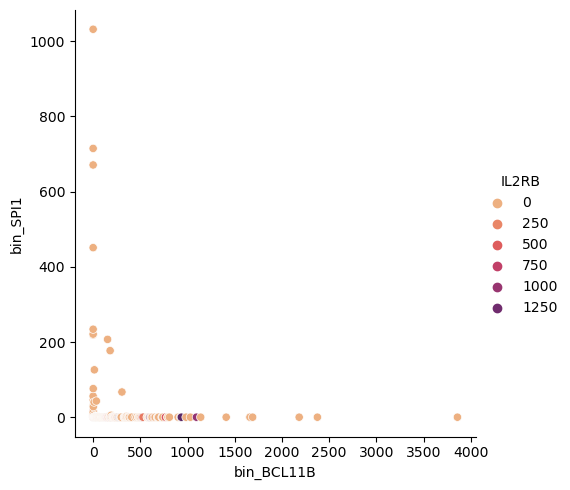

In [44]:
data["bin_BCL11B"] = pd.cut(data["BCL11B"], int(max(data["BCL11B"]+1)), labels = False)
data["bin_SPI1"] = pd.cut(data["SPI1"], int(max(data["SPI1"]+1)), labels = False)
data_binned = data.groupby(["bin_BCL11B", "bin_SPI1"]).mean().reset_index()

g = sns.relplot(
    data= data_binned,
    x="bin_BCL11B", y="bin_SPI1", hue = "IL2RB", 
    height=5, palette="flare")
g.set(title = "")

[Text(0.5, 1.0, ''), None, None]

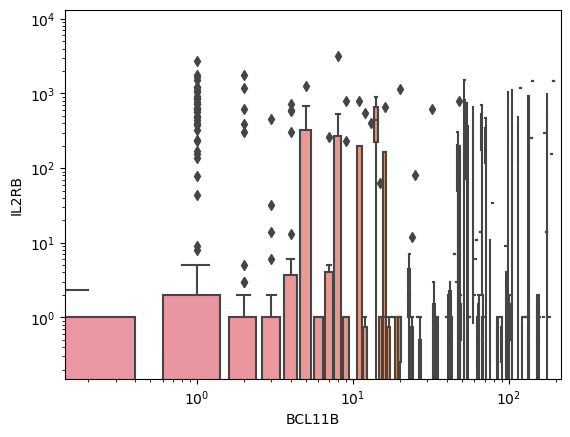

In [50]:
g = sns.boxplot(
    data= data,
    x="BCL11B", y="IL2RB")
g.set(title = "", yscale="log", xscale = "log")

[Text(0.5, 1.0, ''), None, None]

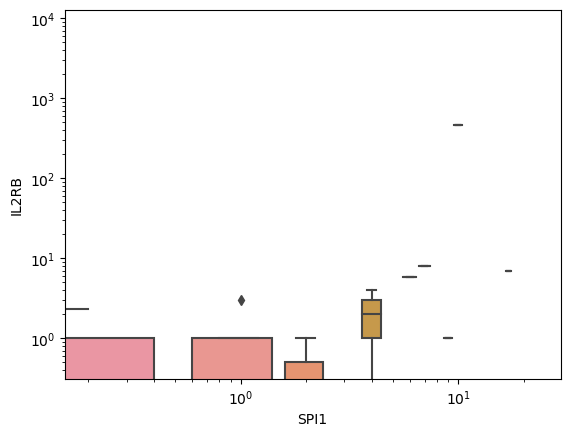

In [49]:
g = sns.boxplot(
    data= data,
    x="SPI1", y="IL2RB")
g.set(title = "", yscale="log")

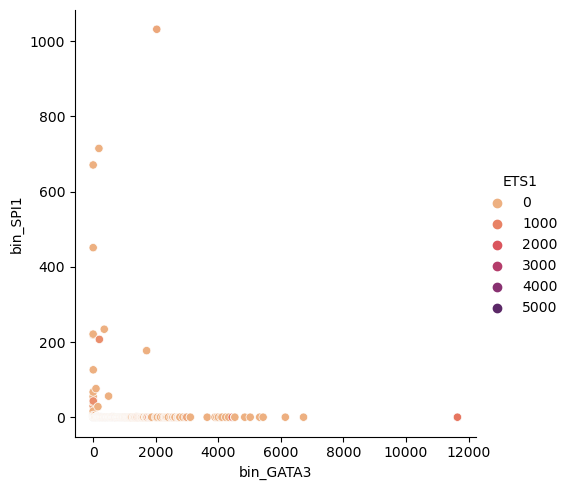

In [51]:
data["bin_GATA3"] = pd.cut(data["GATA3"], int(max(data["GATA3"]+1)), labels = False)
data_binned = data.groupby(["bin_GATA3", "bin_SPI1"]).mean().reset_index()

g = sns.relplot(
    data= data_binned,
    x="bin_GATA3", y="bin_SPI1", hue = "ETS1", 
    height=5, palette="flare")
g.set(title = "")

[Text(0.5, 1.0, ''), None, None]

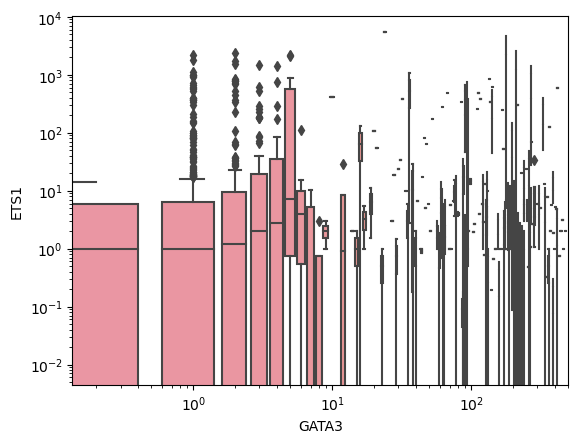

In [52]:
g = sns.boxplot(
    data= data,
    x="GATA3", y="ETS1")
g.set(title = "", yscale="log", xscale = "log")

[Text(0.5, 1.0, ''), None]

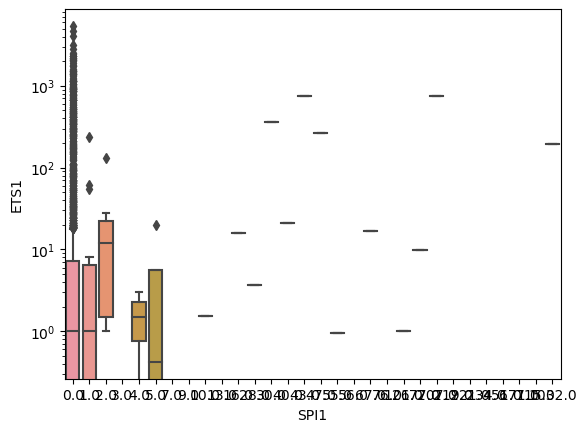

In [53]:
g = sns.boxplot(
    data= data,
    x="SPI1", y="ETS1")
g.set(title = "", yscale="log")

In [54]:
# Mutual information
print(feature_selection.mutual_info_classif(
    np.array(
        data["BCL11B"]).reshape(-1, 1), 
        np.ravel(np.array(data["IL2RB"]).reshape(-1, 1)),
        discrete_features=True,
        random_state=1))

ValueError: Unknown label type: 'continuous'

In [55]:
# Kendall's Tau
data["IL2RB"].corr(data["BCL11B"], "kendall")

-0.01402704990278933

In [56]:
# Mutual information
print(feature_selection.mutual_info_classif(
    np.array(
        data["GATA3"]).reshape(-1, 1), 
        np.ravel(np.array(data["ETS1"]).reshape(-1, 1)),
        discrete_features=True,
        random_state=1))

ValueError: Unknown label type: 'continuous'

In [58]:
# Kendall's Tau
data["GATA3"].corr(data["ETS1"], "kendall")

0.0789238256551945

# With other dataset

from https://www.ebi.ac.uk/gxa/sc/experiments/E-CURD-84/downloads

In [60]:
data_mat = mmread("../../nonCAR_data/E-CURD-84-quantification-raw-files/E-CURD-84.aggregated_filtered_counts.mtx")

In [61]:
file = open("../../nonCAR_data/E-CURD-84-quantification-raw-files/E-CURD-84.aggregated_filtered_counts.mtx_cols")
col_names = file.readlines()
file.close()

In [62]:
file = open("../../nonCAR_data/E-CURD-84-quantification-raw-files/E-CURD-84.aggregated_filtered_counts.mtx_rows")
row_names = file.readlines()
file.close()

In [64]:
node_names = {}
index_num = {}
index = 0
c=0
for node in row_names:
    
    ENSEMBL_id = node.split("\t")[0]
    index_num[ENSEMBL_id] = index
    index+=1
    print(ENSEMBL_id)
    try:

        node_id = mapping.loc[ENSEMBL_id]["index"]
        node_names[node_id] = ENSEMBL_id
    except:
        
        c+=1
        print(c)

ENSG00000000419
ENSG00000000457
ENSG00000000460
ENSG00000000938
ENSG00000000971
ENSG00000001036
ENSG00000001084
ENSG00000001167
ENSG00000001460
ENSG00000001461
ENSG00000001497
ENSG00000001561
ENSG00000001629
ENSG00000001630
ENSG00000001631
ENSG00000002016
ENSG00000002330
ENSG00000002549
ENSG00000002586
ENSG00000002587
ENSG00000002745
ENSG00000002822
ENSG00000002834
ENSG00000002919
ENSG00000003056
ENSG00000003096
ENSG00000003147
ENSG00000003249
ENSG00000003393
ENSG00000003400
ENSG00000003402
ENSG00000003436
ENSG00000003509
ENSG00000003756
ENSG00000003987
ENSG00000004059
ENSG00000004139
ENSG00000004142
ENSG00000004399
ENSG00000004455
ENSG00000004468
ENSG00000004478
ENSG00000004487
ENSG00000004534
ENSG00000004660
ENSG00000004700
ENSG00000004766
ENSG00000004776
ENSG00000004777
ENSG00000004779
ENSG00000004799
ENSG00000004838
ENSG00000004846
ENSG00000004848
ENSG00000004864
ENSG00000004866
ENSG00000004897
ENSG00000004961
ENSG00000004975
ENSG00000005001
ENSG00000005007
ENSG00000005020
ENSG0000

ENSG00000062524
ENSG00000062582
ENSG00000062598
ENSG00000062650
ENSG00000062716
ENSG00000062725
ENSG00000062822
ENSG00000063015
ENSG00000063046
ENSG00000063127
ENSG00000063169
ENSG00000063176
ENSG00000063177
ENSG00000063180
ENSG00000063241
ENSG00000063244
ENSG00000063245
ENSG00000063322
ENSG00000063438
ENSG00000063515
ENSG00000063587
ENSG00000063601
ENSG00000063660
ENSG00000063761
ENSG00000063854
ENSG00000063978
ENSG00000064012
ENSG00000064102
ENSG00000064115
ENSG00000064199
ENSG00000064201
ENSG00000064225
ENSG00000064270
ENSG00000064300
ENSG00000064309
ENSG00000064313
ENSG00000064393
ENSG00000064419
ENSG00000064489
ENSG00000064490
ENSG00000064545
ENSG00000064547
ENSG00000064601
ENSG00000064607
ENSG00000064651
ENSG00000064652
ENSG00000064655
ENSG00000064666
ENSG00000064687
ENSG00000064703
ENSG00000064726
ENSG00000064763
ENSG00000064787
ENSG00000064886
ENSG00000064932
ENSG00000064933
ENSG00000064961
ENSG00000064989
ENSG00000064995
ENSG00000064999
ENSG00000065000
ENSG00000065029
ENSG0000

ENSG00000099785
ENSG00000099795
ENSG00000099797
ENSG00000099800
ENSG00000099804
ENSG00000099810
ENSG00000099814
ENSG00000099817
ENSG00000099821
ENSG00000099822
ENSG00000099840
ENSG00000099849
ENSG00000099860
ENSG00000099866
ENSG00000099875
ENSG00000099889
ENSG00000099899
ENSG00000099901
ENSG00000099904
ENSG00000099910
ENSG00000099917
ENSG00000099937
ENSG00000099940
ENSG00000099942
ENSG00000099949
ENSG00000099953
ENSG00000099954
ENSG00000099956
ENSG00000099957
ENSG00000099958
ENSG00000099960
ENSG00000099968
ENSG00000099974
ENSG00000099977
ENSG00000099984
10
ENSG00000099985
ENSG00000099991
ENSG00000099992
ENSG00000099994
ENSG00000099995
ENSG00000099998
ENSG00000099999
ENSG00000100003
ENSG00000100012
ENSG00000100014
ENSG00000100023
ENSG00000100024
ENSG00000100027
ENSG00000100028
ENSG00000100029
ENSG00000100030
ENSG00000100031
ENSG00000100033
ENSG00000100034
ENSG00000100036
ENSG00000100038
ENSG00000100053
ENSG00000100055
ENSG00000100056
ENSG00000100058
11
ENSG00000100060
ENSG00000100065
EN

ENSG00000110077
ENSG00000110080
ENSG00000110090
ENSG00000110092
ENSG00000110104
ENSG00000110107
ENSG00000110108
ENSG00000110169
ENSG00000110171
ENSG00000110200
ENSG00000110218
ENSG00000110274
ENSG00000110315
ENSG00000110318
ENSG00000110321
ENSG00000110324
ENSG00000110328
ENSG00000110330
ENSG00000110344
ENSG00000110367
ENSG00000110375
ENSG00000110395
ENSG00000110400
ENSG00000110422
ENSG00000110427
ENSG00000110429
ENSG00000110435
ENSG00000110436
ENSG00000110442
ENSG00000110446
ENSG00000110448
ENSG00000110455
ENSG00000110492
ENSG00000110497
ENSG00000110514
ENSG00000110583
ENSG00000110619
ENSG00000110628
ENSG00000110651
ENSG00000110660
ENSG00000110665
ENSG00000110675
ENSG00000110693
ENSG00000110696
ENSG00000110697
ENSG00000110700
ENSG00000110711
ENSG00000110713
ENSG00000110717
ENSG00000110719
ENSG00000110721
ENSG00000110723
ENSG00000110777
ENSG00000110801
ENSG00000110811
ENSG00000110841
ENSG00000110844
ENSG00000110848
ENSG00000110851
ENSG00000110852
ENSG00000110871
ENSG00000110876
ENSG0000

ENSG00000123728
ENSG00000123737
ENSG00000123739
ENSG00000123810
ENSG00000123815
ENSG00000123836
ENSG00000123843
ENSG00000123870
28
ENSG00000123892
ENSG00000123908
ENSG00000123933
ENSG00000123965
29
ENSG00000123975
ENSG00000123983
ENSG00000123989
ENSG00000123992
ENSG00000124006
ENSG00000124019
ENSG00000124067
ENSG00000124074
ENSG00000124091
ENSG00000124097
30
ENSG00000124098
ENSG00000124103
ENSG00000124104
ENSG00000124107
ENSG00000124116
ENSG00000124120
ENSG00000124126
ENSG00000124134
ENSG00000124140
ENSG00000124145
ENSG00000124151
ENSG00000124155
ENSG00000124159
ENSG00000124160
ENSG00000124164
ENSG00000124171
ENSG00000124172
ENSG00000124177
ENSG00000124181
ENSG00000124191
ENSG00000124193
ENSG00000124198
ENSG00000124201
ENSG00000124203
ENSG00000124205
ENSG00000124207
ENSG00000124208
ENSG00000124209
ENSG00000124212
ENSG00000124214
ENSG00000124215
ENSG00000124216
ENSG00000124217
ENSG00000124222
ENSG00000124224
31
ENSG00000124225
ENSG00000124226
ENSG00000124228
ENSG00000124243
ENSG00000124

ENSG00000136098
ENSG00000136099
ENSG00000136100
ENSG00000136104
ENSG00000136108
ENSG00000136111
ENSG00000136114
ENSG00000136122
ENSG00000136141
ENSG00000136143
ENSG00000136144
ENSG00000136146
ENSG00000136147
ENSG00000136149
48
ENSG00000136152
ENSG00000136153
ENSG00000136156
ENSG00000136158
ENSG00000136159
ENSG00000136161
ENSG00000136167
ENSG00000136169
ENSG00000136193
ENSG00000136197
ENSG00000136205
ENSG00000136206
ENSG00000136213
ENSG00000136231
ENSG00000136235
ENSG00000136237
ENSG00000136238
ENSG00000136240
ENSG00000136243
ENSG00000136244
ENSG00000136247
ENSG00000136250
ENSG00000136261
ENSG00000136267
ENSG00000136270
ENSG00000136271
ENSG00000136273
ENSG00000136274
ENSG00000136279
ENSG00000136280
ENSG00000136286
ENSG00000136295
ENSG00000136305
ENSG00000136319
ENSG00000136367
ENSG00000136371
ENSG00000136378
ENSG00000136379
ENSG00000136381
ENSG00000136383
ENSG00000136404
ENSG00000136425
ENSG00000136436
ENSG00000136444
ENSG00000136448
ENSG00000136449
ENSG00000136450
ENSG00000136451
ENSG0

ENSG00000147065
ENSG00000147082
ENSG00000147099
ENSG00000147100
ENSG00000147117
ENSG00000147118
ENSG00000147119
ENSG00000147121
ENSG00000147123
ENSG00000147124
ENSG00000147130
ENSG00000147133
ENSG00000147138
ENSG00000147140
ENSG00000147144
ENSG00000147145
ENSG00000147155
ENSG00000147162
ENSG00000147164
ENSG00000147166
ENSG00000147168
ENSG00000147174
ENSG00000147180
ENSG00000147202
ENSG00000147224
ENSG00000147231
ENSG00000147251
ENSG00000147255
ENSG00000147257
ENSG00000147274
ENSG00000147316
ENSG00000147324
ENSG00000147364
ENSG00000147383
ENSG00000147394
ENSG00000147400
ENSG00000147403
ENSG00000147408
ENSG00000147416
ENSG00000147419
ENSG00000147421
ENSG00000147434
ENSG00000147437
ENSG00000147439
ENSG00000147443
ENSG00000147454
ENSG00000147457
ENSG00000147459
ENSG00000147465
ENSG00000147471
ENSG00000147475
ENSG00000147485
ENSG00000147509
ENSG00000147526
ENSG00000147533
ENSG00000147535
ENSG00000147536
ENSG00000147548
ENSG00000147570
ENSG00000147571
ENSG00000147576
ENSG00000147586
ENSG0000

ENSG00000162191
ENSG00000162194
ENSG00000162222
ENSG00000162227
ENSG00000162231
ENSG00000162236
ENSG00000162241
ENSG00000162244
ENSG00000162298
ENSG00000162300
ENSG00000162302
ENSG00000162337
ENSG00000162341
ENSG00000162368
ENSG00000162373
ENSG00000162377
ENSG00000162378
ENSG00000162383
ENSG00000162384
ENSG00000162385
ENSG00000162390
ENSG00000162396
ENSG00000162398
ENSG00000162402
ENSG00000162407
ENSG00000162408
ENSG00000162413
ENSG00000162415
ENSG00000162419
ENSG00000162426
ENSG00000162430
ENSG00000162433
ENSG00000162434
ENSG00000162437
ENSG00000162438
ENSG00000162441
ENSG00000162444
ENSG00000162458
ENSG00000162461
ENSG00000162482
ENSG00000162490
ENSG00000162496
ENSG00000162510
ENSG00000162511
ENSG00000162512
ENSG00000162517
ENSG00000162520
ENSG00000162521
ENSG00000162522
ENSG00000162526
ENSG00000162542
ENSG00000162543
ENSG00000162545
ENSG00000162571
ENSG00000162572
ENSG00000162576
ENSG00000162585
ENSG00000162591
ENSG00000162594
ENSG00000162599
ENSG00000162600
ENSG00000162601
ENSG0000

ENSG00000169375
ENSG00000169379
ENSG00000169385
ENSG00000169398
ENSG00000169402
ENSG00000169403
ENSG00000169410
ENSG00000169413
ENSG00000169427
ENSG00000169429
ENSG00000169432
ENSG00000169439
ENSG00000169442
ENSG00000169446
ENSG00000169490
ENSG00000169495
ENSG00000169499
ENSG00000169504
ENSG00000169508
ENSG00000169519
ENSG00000169551
ENSG00000169554
ENSG00000169562
ENSG00000169564
ENSG00000169567
ENSG00000169570
ENSG00000169583
ENSG00000169592
ENSG00000169598
ENSG00000169599
ENSG00000169604
ENSG00000169607
ENSG00000169609
ENSG00000169612
ENSG00000169621
ENSG00000169627
ENSG00000169629
ENSG00000169635
ENSG00000169641
ENSG00000169660
ENSG00000169668
96
ENSG00000169679
ENSG00000169682
ENSG00000169683
ENSG00000169684
ENSG00000169689
ENSG00000169692
ENSG00000169696
ENSG00000169710
ENSG00000169714
ENSG00000169715
ENSG00000169718
ENSG00000169727
ENSG00000169733
ENSG00000169738
ENSG00000169740
ENSG00000169744
ENSG00000169750
ENSG00000169752
ENSG00000169756
ENSG00000169758
ENSG00000169762
ENSG0

ENSG00000179933
ENSG00000179934
ENSG00000179938
ENSG00000179941
ENSG00000179943
ENSG00000179950
ENSG00000179954
ENSG00000179958
ENSG00000179965
ENSG00000179967
157
ENSG00000179981
ENSG00000179988
ENSG00000179994
158
ENSG00000180008
ENSG00000180011
ENSG00000180015
159
ENSG00000180019
160
ENSG00000180035
ENSG00000180042
161
ENSG00000180044
ENSG00000180061
ENSG00000180071
ENSG00000180089
ENSG00000180090
ENSG00000180096
ENSG00000180098
ENSG00000180104
ENSG00000180116
ENSG00000180152
162
ENSG00000180155
ENSG00000180176
ENSG00000180182
ENSG00000180185
ENSG00000180189
163
ENSG00000180190
ENSG00000180198
ENSG00000180209
ENSG00000180221
164
ENSG00000180228
ENSG00000180229
165
ENSG00000180233
ENSG00000180245
ENSG00000180251
ENSG00000180257
ENSG00000180263
ENSG00000180279
ENSG00000180304
ENSG00000180329
ENSG00000180332
ENSG00000180336
ENSG00000180340
ENSG00000180346
ENSG00000180353
ENSG00000180354
ENSG00000180357
ENSG00000180370
ENSG00000180376
ENSG00000180385
166
ENSG00000180398
ENSG00000180423


ENSG00000197050
ENSG00000197054
ENSG00000197056
ENSG00000197057
ENSG00000197061
ENSG00000197062
ENSG00000197063
ENSG00000197070
ENSG00000197077
ENSG00000197081
ENSG00000197093
ENSG00000197102
ENSG00000197111
ENSG00000197114
ENSG00000197119
ENSG00000197121
ENSG00000197122
ENSG00000197124
ENSG00000197128
ENSG00000197134
ENSG00000197136
ENSG00000197140
ENSG00000197142
ENSG00000197147
ENSG00000197150
ENSG00000197153
ENSG00000197157
ENSG00000197162
ENSG00000197165
ENSG00000197168
ENSG00000197170
ENSG00000197181
ENSG00000197183
ENSG00000197191
ENSG00000197208
ENSG00000197213
ENSG00000197217
ENSG00000197223
ENSG00000197226
ENSG00000197238
ENSG00000197241
ENSG00000197245
ENSG00000197256
ENSG00000197258
274
ENSG00000197265
ENSG00000197275
ENSG00000197279
ENSG00000197283
ENSG00000197296
ENSG00000197299
ENSG00000197302
ENSG00000197312
ENSG00000197321
ENSG00000197323
ENSG00000197324
ENSG00000197329
ENSG00000197343
ENSG00000197345
ENSG00000197355
ENSG00000197358
275
ENSG00000197360
ENSG00000197361


ENSG00000232208
1809
ENSG00000232228
1810
ENSG00000232237
ENSG00000232280
1811
ENSG00000232282
1812
ENSG00000232303
1813
ENSG00000232312
1814
ENSG00000232320
1815
ENSG00000232326
1816
ENSG00000232333
1817
ENSG00000232337
1818
ENSG00000232339
1819
ENSG00000232362
1820
ENSG00000232367
1821
ENSG00000232373
1822
ENSG00000232376
1823
ENSG00000232380
1824
ENSG00000232382
ENSG00000232385
1825
ENSG00000232387
1826
ENSG00000232388
ENSG00000232398
1827
ENSG00000232414
1828
ENSG00000232422
1829
ENSG00000232429
1830
ENSG00000232431
1831
ENSG00000232433
1832
ENSG00000232434
ENSG00000232437
1833
ENSG00000232439
1834
ENSG00000232450
1835
ENSG00000232454
1836
ENSG00000232456
1837
ENSG00000232457
1838
ENSG00000232460
1839
ENSG00000232466
1840
ENSG00000232472
1841
ENSG00000232479
1842
ENSG00000232486
1843
ENSG00000232489
1844
ENSG00000232499
1845
ENSG00000232516
1846
ENSG00000232531
1847
ENSG00000232541
1848
ENSG00000232553
1849
ENSG00000232554
1850
ENSG00000232569
1851
ENSG00000232573
1852
ENSG00000232

2866
ENSG00000248643
ENSG00000248672
ENSG00000248710
ENSG00000248712
ENSG00000248746
ENSG00000248751
ENSG00000248769
2867
ENSG00000248771
ENSG00000248778
2868
ENSG00000248780
2869
ENSG00000248785
2870
ENSG00000248791
2871
ENSG00000248792
2872
ENSG00000248795
2873
ENSG00000248803
2874
ENSG00000248821
2875
ENSG00000248830
2876
ENSG00000248863
2877
ENSG00000248871
ENSG00000248873
2878
ENSG00000248885
2879
ENSG00000248905
ENSG00000248919
ENSG00000248923
2880
ENSG00000248924
2881
ENSG00000248956
2882
ENSG00000248966
2883
ENSG00000248971
2884
ENSG00000248989
2885
ENSG00000249006
2886
ENSG00000249014
2887
ENSG00000249055
2888
ENSG00000249068
2889
ENSG00000249115
ENSG00000249119
2890
ENSG00000249123
2891
ENSG00000249138
2892
ENSG00000249141
ENSG00000249142
2893
ENSG00000249149
2894
ENSG00000249188
2895
ENSG00000249209
ENSG00000249210
2896
ENSG00000249212
2897
ENSG00000249222
ENSG00000249238
2898
ENSG00000249240
ENSG00000249242
ENSG00000249244
2899
ENSG00000249245
2900
ENSG00000249264
2901
ENSG

ENSG00000277639
ENSG00000277641
4442
ENSG00000277650
4443
ENSG00000277655
4444
ENSG00000277656
4445
ENSG00000277657
4446
ENSG00000277702
4447
ENSG00000277709
4448
ENSG00000277710
4449
ENSG00000277725
4450
ENSG00000277734
ENSG00000277741
4451
ENSG00000277745
ENSG00000277750
4452
ENSG00000277751
4453
ENSG00000277753
4454
ENSG00000277758
ENSG00000277768
4455
ENSG00000277769
4456
ENSG00000277770
4457
ENSG00000277773
4458
ENSG00000277775
ENSG00000277778
ENSG00000277781
4459
ENSG00000277789
4460
ENSG00000277791
ENSG00000277795
4461
ENSG00000277796
4462
ENSG00000277807
4463
ENSG00000277808
4464
ENSG00000277816
4465
ENSG00000277823
4466
ENSG00000277833
4467
ENSG00000277835
4468
ENSG00000277850
4469
ENSG00000277865
ENSG00000277867
4470
ENSG00000277868
4471
ENSG00000277876
4472
ENSG00000277897
4473
ENSG00000277909
4474
ENSG00000277923
4475
ENSG00000277926
4476
ENSG00000277936
4477
ENSG00000277943
4478
ENSG00000277949
4479
ENSG00000277953
4480
ENSG00000277956
4481
ENSG00000277957
ENSG00000277964


I want to use the same nodes as before: BCL11B, GATA3, SPI1, RUNX3, IL2RB, ETS1 

In [65]:
# Get index of nodes of interest
index_of_interest = []
for node in ["BCL11B", "GATA3", "SPI1", "RUNX3", "IL2RB", "ETS1" ]:
    ensemble_id = node_names[node]
    index_of_interest.append(index_num[ensemble_id])

In [66]:
data = data_mat.tocsr()[index_of_interest,:]

In [67]:
data = pd.DataFrame.sparse.from_spmatrix(data)
data = data.transpose()
data.columns = ["BCL11B", "GATA3", "SPI1", "RUNX3", "IL2RB", "ETS1" ]
data = data.sparse.to_dense()
data

,BCL11B,GATA3,SPI1,RUNX3,IL2RB,ETS1
0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,2.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
37213,0.0,0.0,0.0,0.0,1.0,0.0
37214,0.0,0.0,0.0,0.0,0.0,1.0
37215,1.0,2.0,0.0,3.0,1.0,2.0
37216,2.0,0.0,0.0,0.0,1.0,1.0


In [68]:
data

,BCL11B,GATA3,SPI1,RUNX3,IL2RB,ETS1
0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,2.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
37213,0.0,0.0,0.0,0.0,1.0,0.0
37214,0.0,0.0,0.0,0.0,0.0,1.0
37215,1.0,2.0,0.0,3.0,1.0,2.0
37216,2.0,0.0,0.0,0.0,1.0,1.0


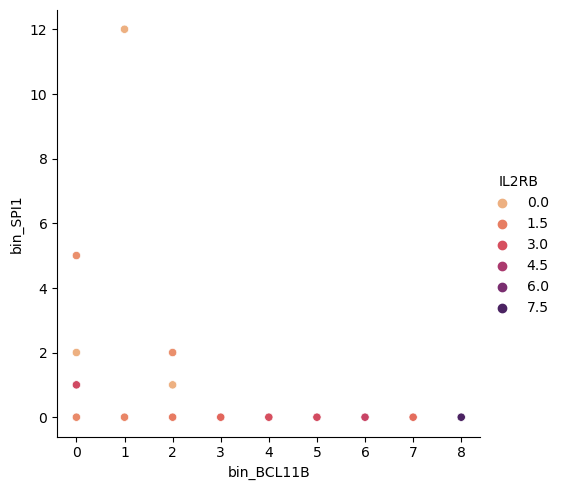

In [69]:
data["bin_BCL11B"] = pd.cut(data["BCL11B"], int(max(data["BCL11B"]+1)), labels = False)
data["bin_SPI1"] = pd.cut(data["SPI1"], int(max(data["SPI1"]+1)), labels = False)
data_binned = data.groupby(["bin_BCL11B", "bin_SPI1"]).mean().reset_index()

g = sns.relplot(
    data= data_binned,
    x="bin_BCL11B", y="bin_SPI1", hue = "IL2RB", 
    height=5, palette="flare")
g.set(title = "")

[Text(0.5, 1.0, '')]

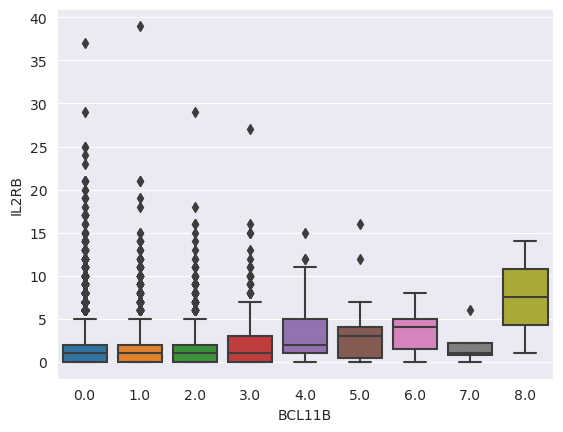

In [87]:
sns.set_style("darkgrid")
g = sns.boxplot(
    data= data,
    x="BCL11B", y="IL2RB")
g.set(title = "")

[Text(0.5, 1.0, '')]

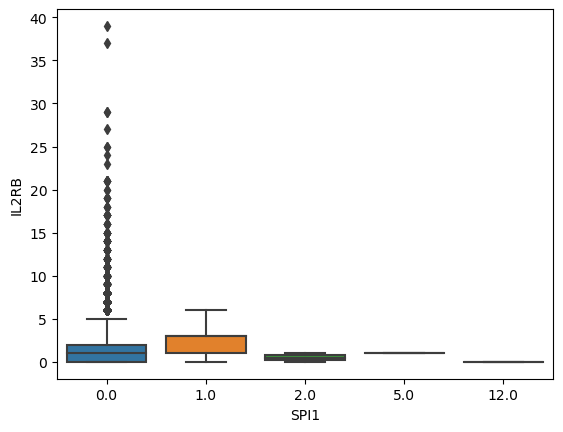

In [80]:
g = sns.boxplot(
    data= data,
    x="SPI1", y="IL2RB")
g.set(title = "")

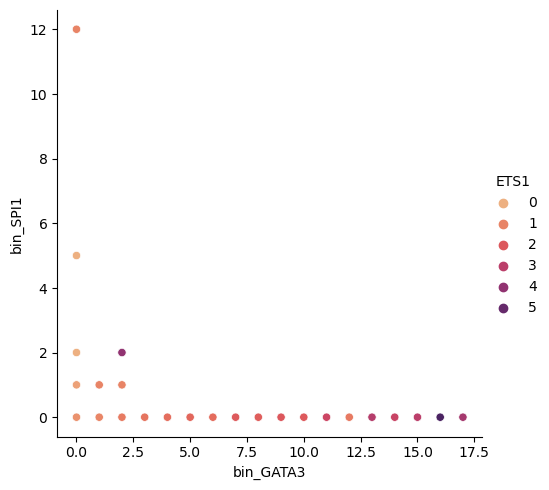

In [72]:
data["bin_GATA3"] = pd.cut(data["GATA3"], int(max(data["GATA3"]+1)), labels = False)
data_binned = data.groupby(["bin_GATA3", "bin_SPI1"]).mean().reset_index()

g = sns.relplot(
    data= data_binned,
    x="bin_GATA3", y="bin_SPI1", hue = "ETS1", 
    height=5, palette="flare")
g.set(title = "")

[Text(0.5, 1.0, ''),

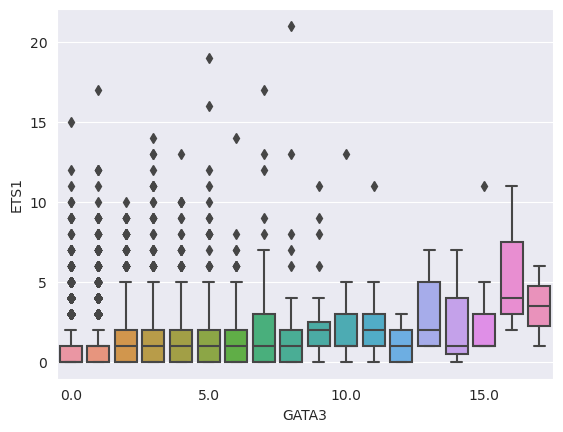

In [92]:
sns.set_style("darkgrid")
g = sns.boxplot(
    data= data[data["SPI1"]==0],
    x="GATA3", y="ETS1")
g.set(title = "", xticks=[0,5,10,15])

[Text(0.5, 1.0, '')]

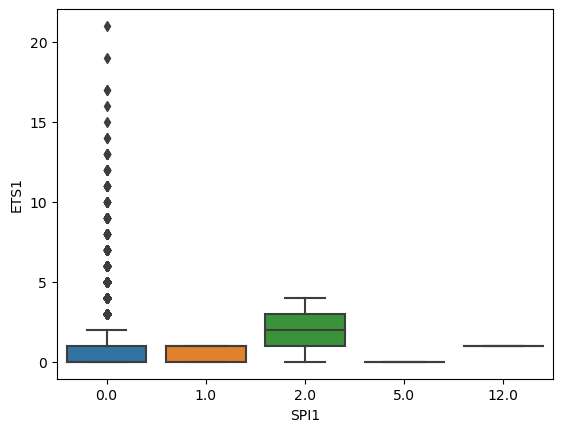

In [82]:
g = sns.boxplot(
    data= data,
    x="SPI1", y="ETS1")
g.set(title = "")

In [75]:
# Mutual information
print(feature_selection.mutual_info_classif(
    np.array(
        data["BCL11B"]).reshape(-1, 1), 
        np.ravel(np.array(data["IL2RB"]).reshape(-1, 1)),
        discrete_features=True,
        random_state=1))

[0.00757722]


In [76]:
# Kendall's Tau
data["IL2RB"].corr(data["BCL11B"], "kendall")

0.07371565838134218

In [77]:
# Mutual information
print(feature_selection.mutual_info_classif(
    np.array(
        data["GATA3"]).reshape(-1, 1), 
        np.ravel(np.array(data["ETS1"]).reshape(-1, 1)),
        discrete_features=True,
        random_state=1))

[0.02339811]


In [78]:
# Kendall's Tau
data["GATA3"].corr(data["ETS1"], "kendall")

0.15561662557869643

In [91]:
from scipy.stats import kendalltau
print(kendalltau(data["IL2RB"],data["BCL11B"] ))

print(kendalltau(data["ETS1"],data["GATA3"] ))

KendalltauResult(correlation=0.07371565838134218, pvalue=4.680361043283645e-57)
KendalltauResult(correlation=0.1556166255786964, pvalue=1.4818191981942702e-254)


# Correlation between TF ATF2 and the genes it regulates

In [18]:
end_genes = [gene for gene in G_GRN.nodes() if len([s for s in G_GRN.successors(gene)])==0]
end_genes

['GADS',
 'mTOR',
 'Bcl2',
 'BclXL',
 'IL10',
 'KLRG1',
 'IRF4',
 'IFNG',
 'LEF1',
 'G0S2',
 'PRDM1',
 'TNFRSF9',
 'TCF7',
 'GZMK',
 'IL13',
 'CDCA2',
 'HAVCR1',
 'LAG3',
 'HAVCR2',
 'CXCL8',
 'ZNF683',
 'FOXP1',
 'IL1B',
 'ID2',
 'CSF2',
 'CDK1',
 'MKI67',
 'GZMB',
 'TNFRSF18',
 'IL17RA',
 'EOMES',
 'CD160',
 'CCL5',
 'IL1A',
 'LAYN',
 'IL7R',
 'LIF',
 'CENPV',
 'CD226',
 'CD69',
 'PDCD1',
 'NCAM1',
 'GNLY',
 'BTLA',
 'CCR7',
 'NKG7',
 'IL2',
 'BATF',
 'CCL1',
 'CD27',
 'CCNA2',
 'SELL',
 'CCL3',
 'BATF3',
 'CEBPZ',
 'TNFa',
 'IL6',
 'ORC6',
 'NCR1',
 'ZEB2',
 'CCL20',
 'TBX21',
 'HOPX',
 'ICOS',
 'CCL4',
 'CD244',
 'TIGIT',
 'cmyc',
 'GZMH',
 'CD2',
 'KLF2',
 'IL2RA',
 'TNF',
 'ENTPD1',
 'PRF1',
 'ADORA2A',
 'TNFRSF4',
 'KIR3DL1',
 'GZMA',
 'CD3E',
 'IL16']

In [35]:
only_one_TF = [gene for gene in end_genes if len([s for s in G_GRN.predecessors(gene)])==2]
only_one_TF

['Bcl2', 'BclXL', 'ICOS', 'GZMA', 'CD3E']

In [26]:
[node for node in G_GRN.predecessors("CEBPZ")]

['p38']

In [27]:
[node for node in G_GRN.predecessors("IL16")]

['REST']

In [14]:
[node for node in G_GRN.successors("STAT1")]

['TNFRSF4',
 'CCNA2',
 'IL1A',
 'CD226',
 'CDK1',
 'CDCA2',
 'CD244',
 'CD69',
 'TCF7',
 'FOXP1',
 'BATF3',
 'CCL5',
 'CD160',
 'CCL3',
 'STAT1',
 'IRF4',
 'TBX21',
 'ORC6',
 'AP1',
 'CD28',
 'SELL',
 'TNFRSF9',
 'PRDM1',
 'CD27',
 'CCR7',
 'MKI67',
 'BTLA',
 'LEF1',
 'ID2',
 'EOMES',
 'NKG7',
 'G0S2',
 'TNFRSF18',
 'PDCD1',
 'IL17RA',
 'CENPV',
 'HAVCR2',
 'ADORA2A',
 'BATF',
 'IL10',
 'CCL1']

0.023265554279085627


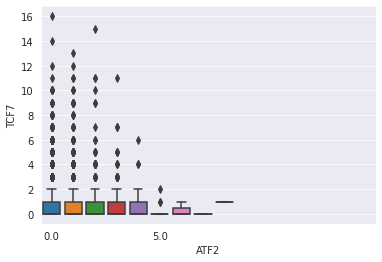

In [46]:
sns.set_style("darkgrid")
g = sns.boxplot(
    data= all_expr,
    x="ATF2", y="TCF7")
g.set(title = "", xticks=[0,5,10,15])

print(all_expr["ATF2"].corr(all_expr["TCF7"], "kendall"))

0.04909945920655079


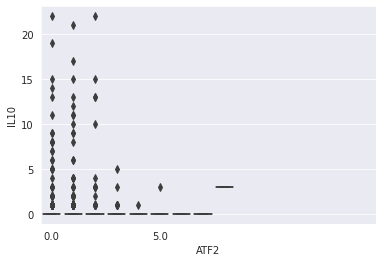

In [47]:
sns.set_style("darkgrid")
g = sns.boxplot(
    data= all_expr,
    x="ATF2", y="IL10")
g.set(title = "", xticks=[0,5,10,15])

print(all_expr["ATF2"].corr(all_expr["IL10"], "kendall"))

0.13832087136984017


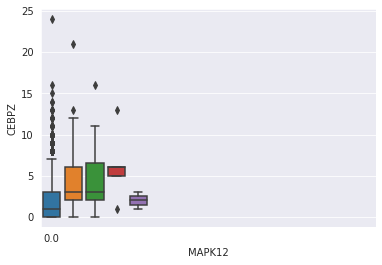

In [48]:
# MAPK12 = p38
sns.set_style("darkgrid")
g = sns.boxplot(
    data= all_expr,
    x="MAPK12", y="CEBPZ")
g.set(title = "", xticks=[0,5,10,15])

print(all_expr["MAPK12"].corr(all_expr["CEBPZ"], "kendall"))

0.11333476319760907


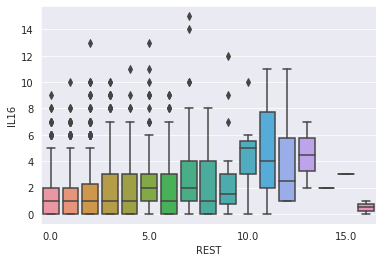

In [49]:

sns.set_style("darkgrid")
g = sns.boxplot(
    data= all_expr,
    x="REST", y="IL16")
g.set(title = "", xticks=[0,5,10,15])

print(all_expr["REST"].corr(all_expr["IL16"], "kendall"))

In [32]:
mapping[mapping["node_name"]=="p38"]

,index,gene_ids,ncbi_id,KEGG_ko,node_name
gene_ids,,,,,
ENSG00000188130,MAPK12,ENSG00000188130,6300.0,K04441,p38


In [37]:
TFs = pickle.load(open("../../CAR_data/TF_list", "rb"))
[i for i in ['Bcl2', 'BclXL', 'ICOS', 'GZMA', 'CD3E'] if i not in TFs]

['ICOS', 'GZMA', 'CD3E']

In [40]:
[node for node in G_GRN.predecessors("CD3E")]

['GATA1', 'GATA2']

nan
0.0034332908943318003


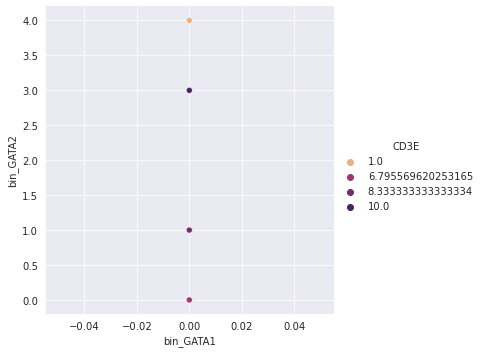

In [50]:
all_expr["bin_GATA1"] = pd.cut(all_expr["GATA1"], int(max(all_expr["GATA1"]+1)), labels = False)
all_expr["bin_GATA2"] = pd.cut(all_expr["GATA2"], int(max(all_expr["GATA2"]+1)), labels = False)
data_binned = all_expr.groupby(["bin_GATA1", "bin_GATA2"]).mean().reset_index()

g = sns.relplot(
    data= data_binned,
    x="bin_GATA1", y="bin_GATA2", hue = "CD3E", 
    height=5, palette="flare")


print(all_expr["GATA1"].corr(all_expr["CD3E"], "kendall"))
print(all_expr["GATA2"].corr(all_expr["CD3E"], "kendall"))

In [39]:
[node for node in G_GRN.predecessors("GZMA")]

['ETS1', 'REST']

0.08656016358691437
0.0682701984720454


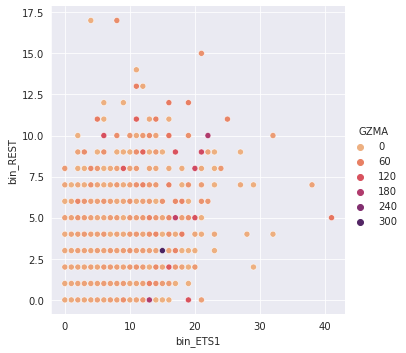

In [51]:
all_expr["bin_ETS1"] = pd.cut(all_expr["ETS1"], int(max(all_expr["ETS1"]+1)), labels = False)
all_expr["bin_REST"] = pd.cut(all_expr["REST"], int(max(all_expr["REST"]+1)), labels = False)
data_binned = all_expr.groupby(["bin_ETS1", "bin_REST"]).mean().reset_index()

g = sns.relplot(
    data= data_binned,
    x="bin_ETS1", y="bin_REST", hue = "GZMA", 
    height=5, palette="flare")
g.set(title = "")

print(all_expr["ETS1"].corr(all_expr["GZMA"], "kendall"))
print(all_expr["REST"].corr(all_expr["GZMA"], "kendall"))

In [38]:
[node for node in G_GRN.predecessors("ICOS")]

['STAT3', 'REST']

0.11733329855310225
0.1683549033698865


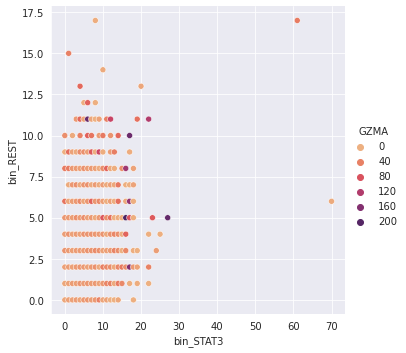

In [52]:
all_expr["bin_STAT3"] = pd.cut(all_expr["STAT3"], int(max(all_expr["STAT3"]+1)), labels = False)
all_expr["bin_REST"] = pd.cut(all_expr["REST"], int(max(all_expr["REST"]+1)), labels = False)
data_binned = all_expr.groupby(["bin_STAT3", "bin_REST"]).mean().reset_index()

g = sns.relplot(
    data= data_binned,
    x="bin_STAT3", y="bin_REST", hue = "GZMA", 
    height=5, palette="flare")
g.set(title = "")

print(all_expr["STAT3"].corr(all_expr["ICOS"], "kendall"))
print(all_expr["REST"].corr(all_expr["ICOS"], "kendall"))